# Analysis of Habitable Exoplanets

In [70]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from textwrap import wrap

### Pie Chart of Controversial Flags

Number of exoplanets with a controversial flag of 1: 51
Number of exoplanets with a controversial flag of 0: 33069


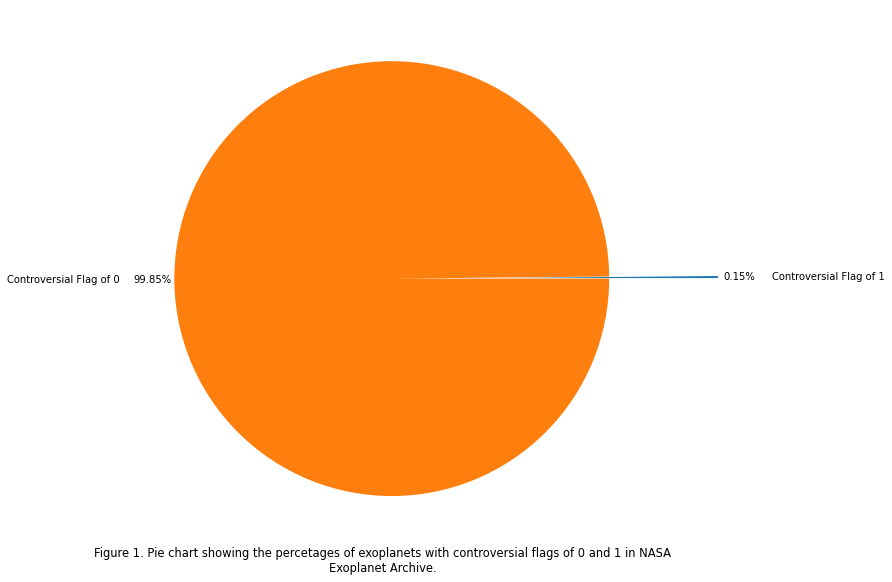

In [85]:
# Reading in the entire dataset

df = pd.read_csv('dataset.csv',low_memory=False)

# Counting the number of exoplanets with a controversial flag of 1 
# which means that their existence has been questioned in the past

num_controv_flags = len(df.loc[df['pl_controv_flag']==1])

# Number of exoplanets with a controversial flag of 0
# is the total number of exoplanets minus the exoplanets with a
# controversial flag of 1

num_no_controv_flags = len(df)-num_controv_flags

print("Number of exoplanets with a controversial flag of 1: {}".format(num_controv_flags))
print("Number of exoplanets with a controversial flag of 0: {}".format(num_no_controv_flags))

# Creates a pie chart to visualize the number of exoplanets with a controversial flag of 1

nums_controv = [num_controv_flags,num_no_controv_flags]
labels_controv = ['Controversial Flag of 1', 'Controversial Flag of 0']
explode_controv = [0.5,0]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(nums_controv,labels=labels_controv,autopct='%1.2f%%',explode=explode_controv,pctdistance=1.1,labeldistance=1.25)
fig.suptitle("\n".join(wrap("Figure 1. Pie chart showing the percetages of exoplanets with controversial flags of 0 and 1 in NASA Exoplanet Archive.", 105)),y=0.13,size=11.5)
plt.show()

### Pie Chart of Duplicates

Number of unique entries: 5071
Number of duplicate entries: 28049


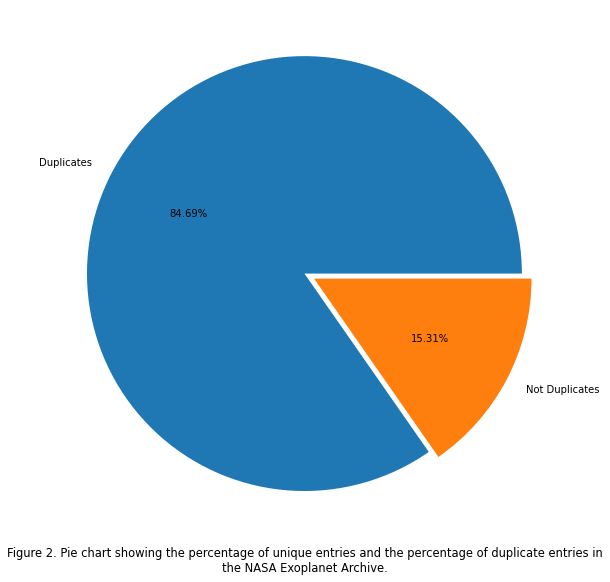

In [84]:
# Finds the total number of exoplanets (including duplicates)
# The reason that I didn't define a variable for the pd.read_csv part
# is that running the code multiple times (which will drop duplicates, as seen later in this block)
# will change the number because it will affect the original variable

total_num = len(pd.read_csv('dataset.csv',low_memory=False))

#print(total_num)

# Now we define the variable

df1 = pd.read_csv('dataset.csv',low_memory=False)

# Removes duplicates, leaving only unique exoplanets

df1 = df.drop_duplicates(subset=['pl_name'],keep='last')

num_not_duplicates = len(df1)

# Number of duplicates is the total number of exoplanets minus the number of unique entries

num_duplicates = total_num - num_not_duplicates

print("Number of unique entries: {}".format(num_not_duplicates))
print("Number of duplicate entries: {}".format(num_duplicates))

# Creates a pie chart to visualize the number of duplicates

nums_dups = [num_duplicates,num_not_duplicates]
labels_dups = ['Duplicates','Not Duplicates']
explode_dups = [0.05,0]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(nums_dups,labels=labels_dups,autopct='%1.2f%%',explode=explode_dups)
fig.suptitle("\n".join(wrap("Figure 2. Pie chart showing the percentage of unique entries and the percentage of duplicate entries in the NASA Exoplanet Archive.", 105)),y=0.13,size=11.5)
plt.show()

### Pie Chart of Habitability

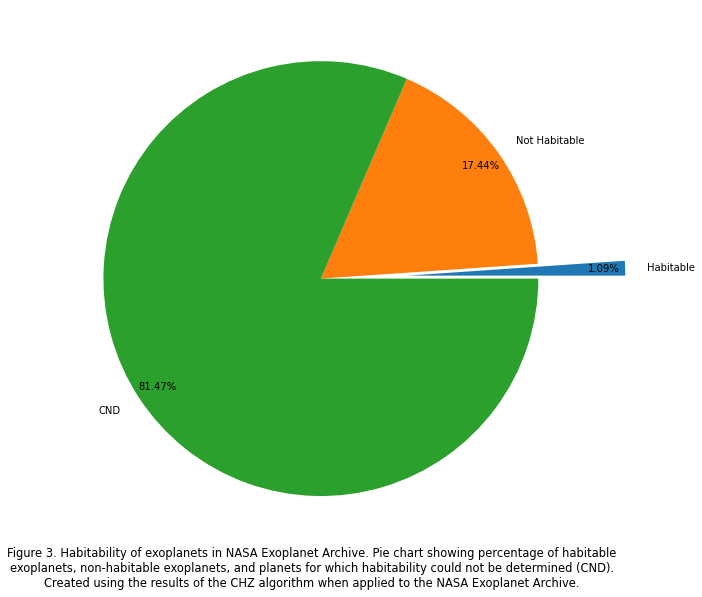

In [78]:
nums = [55, 880, 4110]
labels = ['Habitable', 'Not Habitable', 'CND']
explode=[0.4,0,0]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(nums, labels=labels,autopct='%1.2f%%',pctdistance=0.9,explode=explode)
fig.suptitle("\n".join(wrap("Figure 3. Habitability of exoplanets in NASA Exoplanet Archive. Pie chart showing percentage of habitable exoplanets, non-habitable exoplanets, and planets for which habitability could not be determined (CND). Created using the results of the CHZ algorithm when applied to the NASA Exoplanet Archive.", 105)),y=0.13,size=11.5)
plt.show()

### Obtaining the Dataset With Only the Habitable Exoplanets

In [16]:
df2 = pd.read_csv('habitable_exoplanets_data.csv')

### Histogram of Orbital Eccentricity Values of Habitable Exoplanets

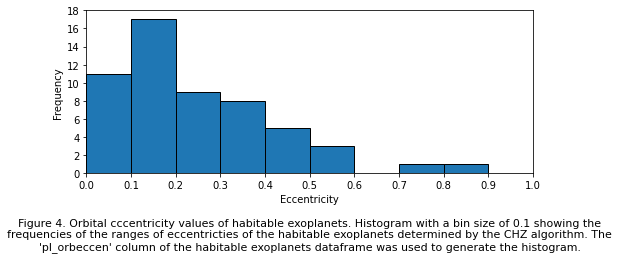

In [40]:
bins = np.linspace(0,1,11)
plt.figure(figsize=(8,3))
plt.hist(df2['pl_orbeccen'],bins=bins,ec='black')
plt.xticks(bins)
plt.yticks(np.arange(0,20,2))
plt.title("\n".join(wrap('Figure 4. Orbital cccentricity values of habitable exoplanets. Histogram with a bin size of 0.1 showing the frequencies of the ranges of eccentricties of the habitable exoplanets determined by the CHZ algorithm. The \'pl_orbeccen\' column of the habitable exoplanets dataframe was used to generate the histogram.',118)),y=-0.50,size=11)
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Orbital Period Values of Habitable Exoplanets

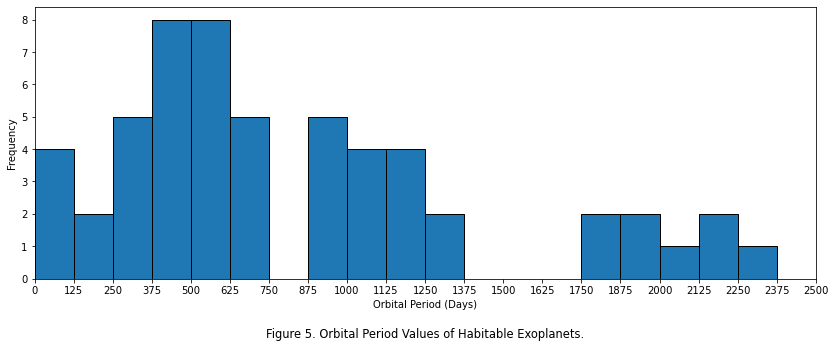

In [41]:
plt.figure(figsize=(14,5))
bins = np.linspace(0,2500,21)
plt.hist(df2['pl_orbper'],bins=bins,ec='black')
plt.title("\n".join(wrap('Figure 5. Orbital Period Values of Habitable Exoplanets.',80)),y=-0.24,size=11.5)
plt.xticks(bins)
plt.xlabel('Orbital Period (Days)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Semi-Major Axis Values of Habitable Exoplanets

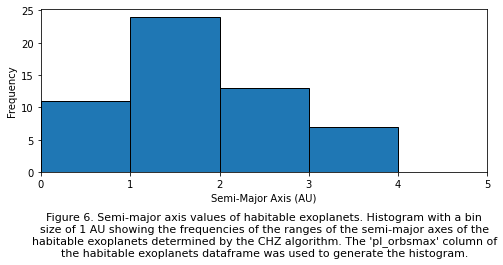

In [42]:
plt.figure(figsize=(8,3))
bins=np.linspace(0,5,6)
plt.hist(df2['pl_orbsmax'],bins=bins,ec='black')
plt.title("\n".join(wrap('Figure 6. Semi-major axis values of habitable exoplanets. Histogram with a bin size of 1 AU showing the frequencies of the ranges of the semi-major axes of the habitable exoplanets determined by the CHZ algorithm. The \'pl_orbsmax\' column of the habitable exoplanets dataframe was used to generate the histogram.',80)),y=-0.55,size=11)
plt.xticks(bins)
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Host Star Temperature Values of Habitable Exoplanets

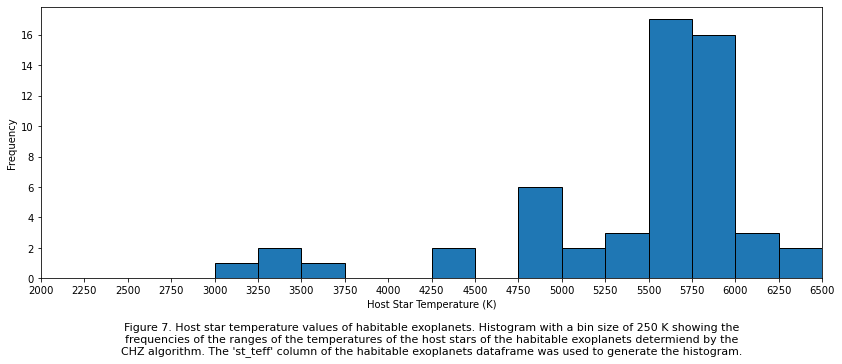

In [43]:
plt.figure(figsize=(14,5))
bins=np.linspace(2000,6500,19)
plt.hist(df2['st_teff'],ec='black',bins=bins)
plt.title("\n".join(wrap('Figure 7. Host star temperature values of habitable exoplanets. Histogram with a bin size of 250 K showing the frequencies of the ranges of the temperatures of the host stars of the habitable exoplanets determiend by the CHZ algorithm. The \'st_teff\' column of the habitable exoplanets dataframe was used to generate the histogram.',110)),y=-0.30,size=11)
plt.xticks(bins)
plt.xlabel('Host Star Temperature (K)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Host Star Radii Values of Habitable Exoplanets

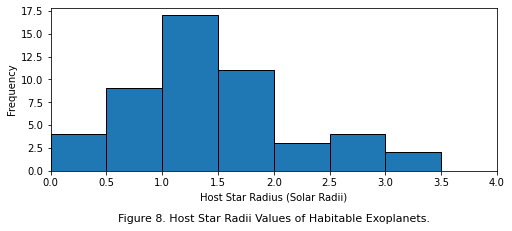

In [48]:
plt.figure(figsize=(8,3))
bins=np.linspace(0,4,9)
plt.hist(df2['st_rad'],ec='black',bins=bins)
plt.title("\n".join(wrap('Figure 8. Host Star Radii Values of Habitable Exoplanets.',80)),y=-0.35,size=11)
plt.xticks(bins)
plt.xlabel('Host Star Radius (Solar Radii)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Host Star Mass Values of Habitable Exoplanets

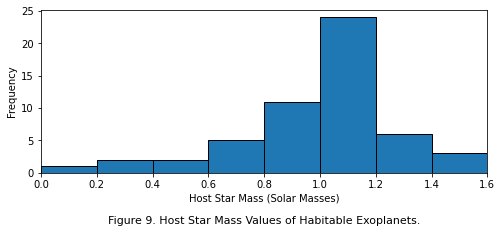

In [47]:
plt.figure(figsize=(8,3))
bins=np.linspace(0,1.6,9)
plt.hist(df2['st_mass'],ec='black',bins=bins)
plt.title("\n".join(wrap('Figure 9. Host Star Mass Values of Habitable Exoplanets.',80)),y=-0.35,size=11)
plt.xticks(bins)
plt.xlabel('Host Star Mass (Solar Masses)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()

### Histogram of Host Star Luminosity Values of Habitable Exoplanets

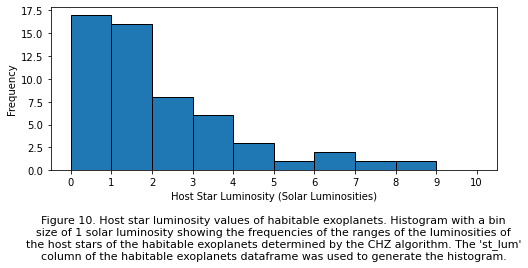

In [39]:
plt.figure(figsize=(8,3))
bins=np.linspace(0,10,11)
plt.hist(df2['st_lum'],ec='black',bins=bins)
plt.title("\n".join(wrap('Figure 10. Host star luminosity values of habitable exoplanets. Histogram with a bin size of 1 solar luminosity showing the frequencies of the ranges of the luminosities of the host stars of the habitable exoplanets determined by the CHZ algorithm. The \'st_lum\' column of the habitable exoplanets dataframe was used to generate the histogram.',88)),y=-0.58,size=11)
plt.xticks(bins)
plt.xlabel('Host Star Luminosity (Solar Luminosities)')
plt.ylabel('Frequency')
plt.show()

### Histogram of Host Star Metallicity Values of Habitable Exoplanets

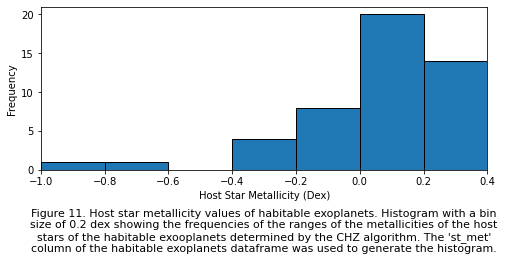

In [46]:
plt.figure(figsize=(8,3))
bins = np.linspace(-1,0.4,8)
plt.hist(df2['st_met'],ec='black',bins=bins)
plt.title("\n".join(wrap('Figure 11. Host star metallicity values of habitable exoplanets. Histogram with a bin size of 0.2 dex showing the frequencies of the ranges of the metallicities of the host stars of the habitable exooplanets determined by the CHZ algorithm. The \'st_met\' column of the habitable exoplanets dataframe was used to generate the histogram.',86)),y=-0.54,size=11)
plt.xticks(bins)
plt.xlabel('Host Star Metallicity (Dex)')
plt.ylabel('Frequency')
plt.margins(x=0)
plt.show()